<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 4: **Aplicações da verossimilhança**
___

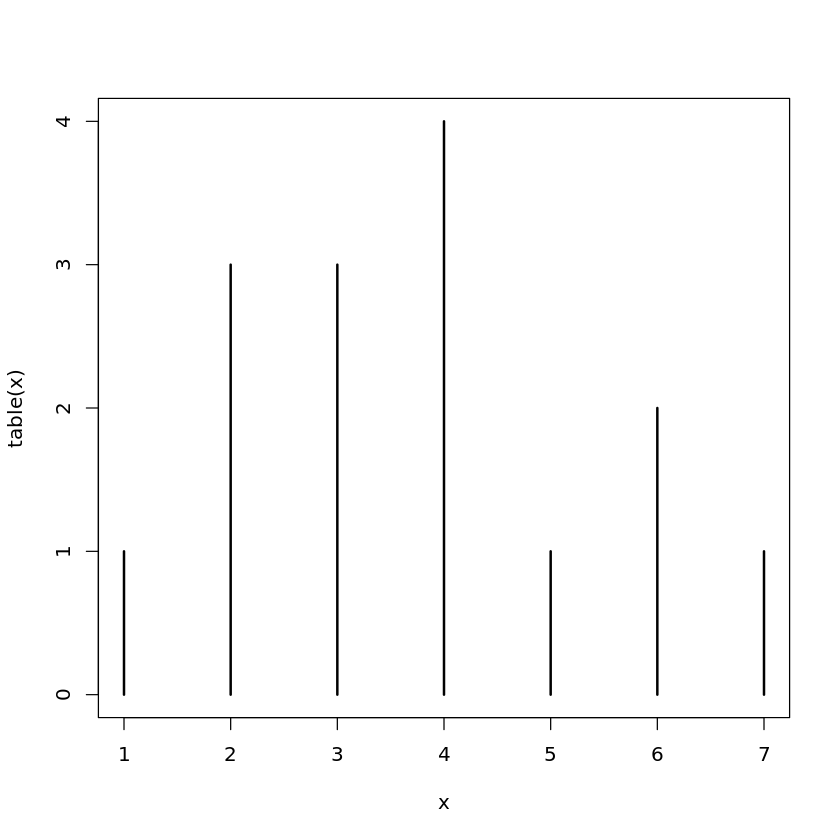

In [1]:
# dados exemplo
x <- c(7, 6, 6, 4, 4, 3, 2, 5, 2, 4, 3, 4, 3, 2, 1)
plot(table(x))

___
**Método da máxima verossimilhança**

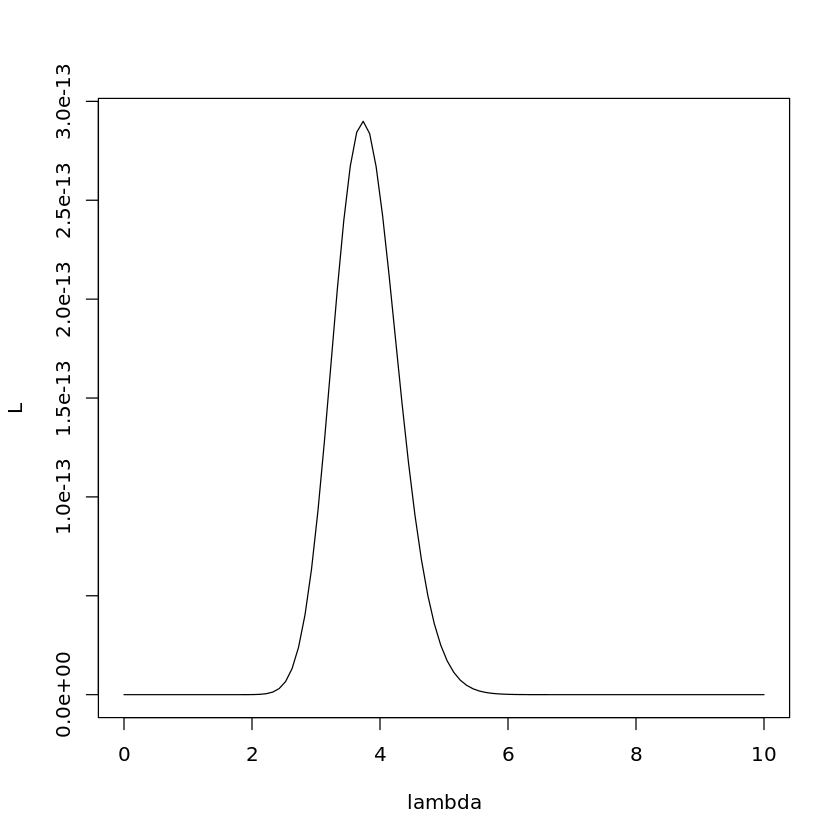

In [2]:
lambda  <- seq(0, 10, length.out = 100)             # seq. de 100  valores  de  lambda
L <- c()
for(i in  1:100) L[i] <- prod(dpois(x, lambda[i]))  # loop para computar L com a dist. Poisson
plot(L ~ lambda , type = "l")                       # gráfico da função de verossimilhança 

[1] 3.737374

[1] 2.899001e-13

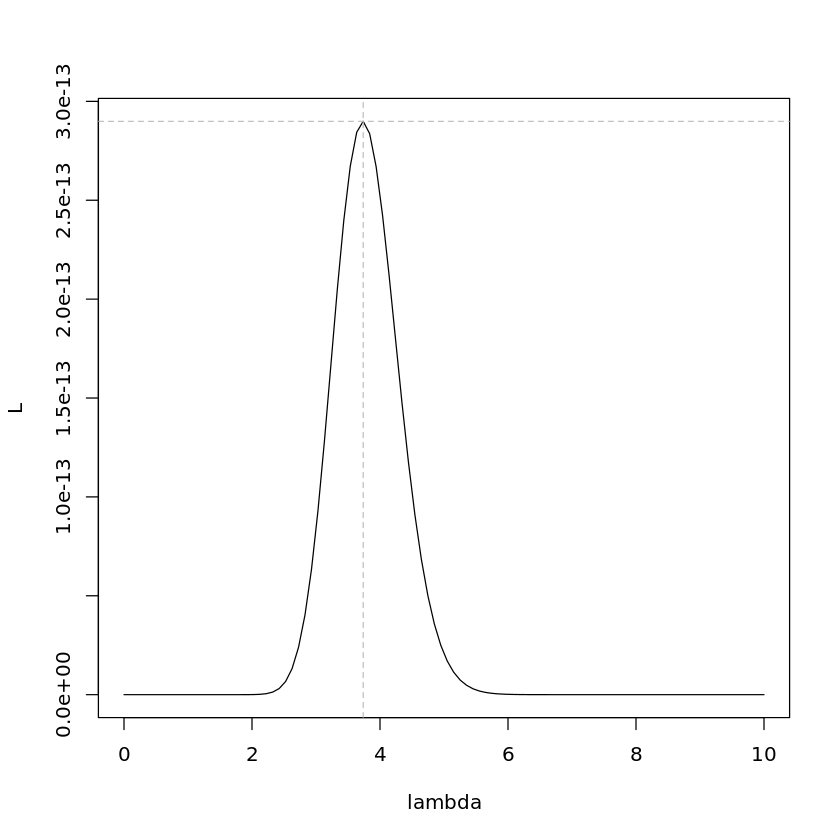

In [3]:
o <- which.max(L)   # indexa o maximo  de L
lambda[o]           # estimativa de MV de lambda (média da Poisson)
L[o]
plot(L ~ lambda , type = "l") 
abline(v = lambda[o], h = L[o], lty = 2, col = "gray")

In [5]:
# código mais eficiente
negLogL  <- function(lambda) -sum(dpois(x, lambda , log = TRUE))  # define -logL(lambda)
optimize(f = negLogL , interval = c(2, 8))                        # otimizador unidimensional para encontrar o mínimo

$minimum
[1] 3.733321

$objective
[1] 28.86921

*Estimando dois ou mais parâmetros - exemplo gama*

In [6]:
negLogL  <- function(pars) {
    -log(prod(dgamma(x, shape = pars[1],  scale = pars[2])))
}
optim(par = c(a = 6, b = 0.7), fn = negLogL)

$par
        a         b 
4.5718433 0.8166294 

$value
[1] 28.49006

$counts
function gradient 
      55       NA 

$convergence
[1] 0

$message
NULL

*Precisão da estimativa*

In [8]:
emv  <- optim(par = c(a = 6, b = 0.7), fn = negLogL, hessian = TRUE)
emv

,a,b
a,3.665693,18.36819
b,18.368195,102.82468


In [9]:
solve(emv$hessian) # matriz de covariâncias das estimativas de MV

,a,b
a,2.6009717,-0.46462731
b,-0.4646273,0.09272448


___
**AIC e escolha do modelo**

[1] 0.2111111

[1] 1.260531e-16

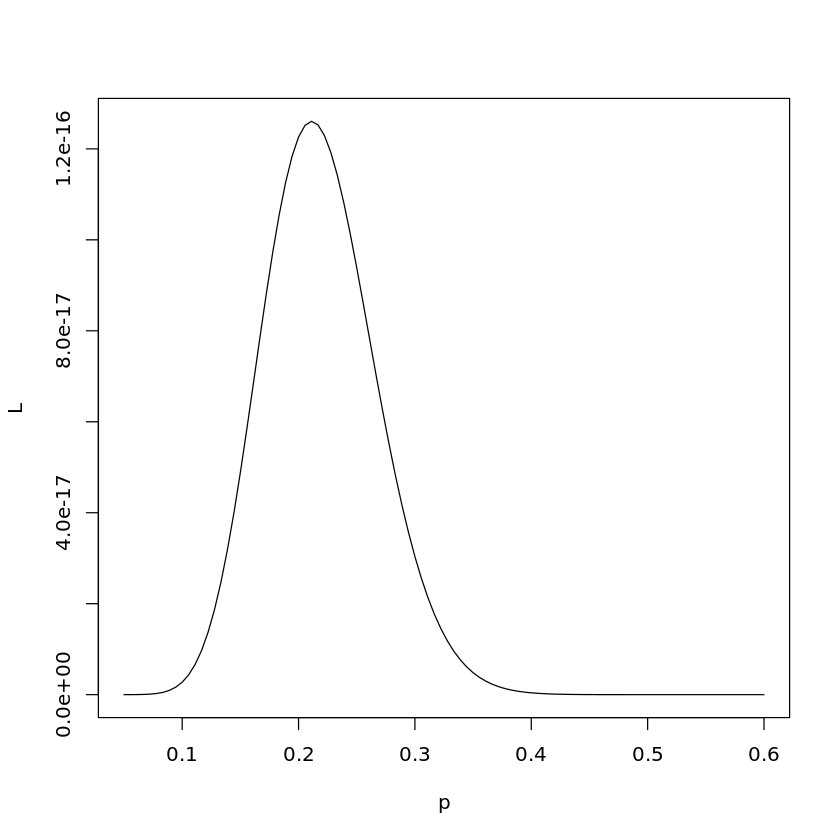

[1] -36.60983

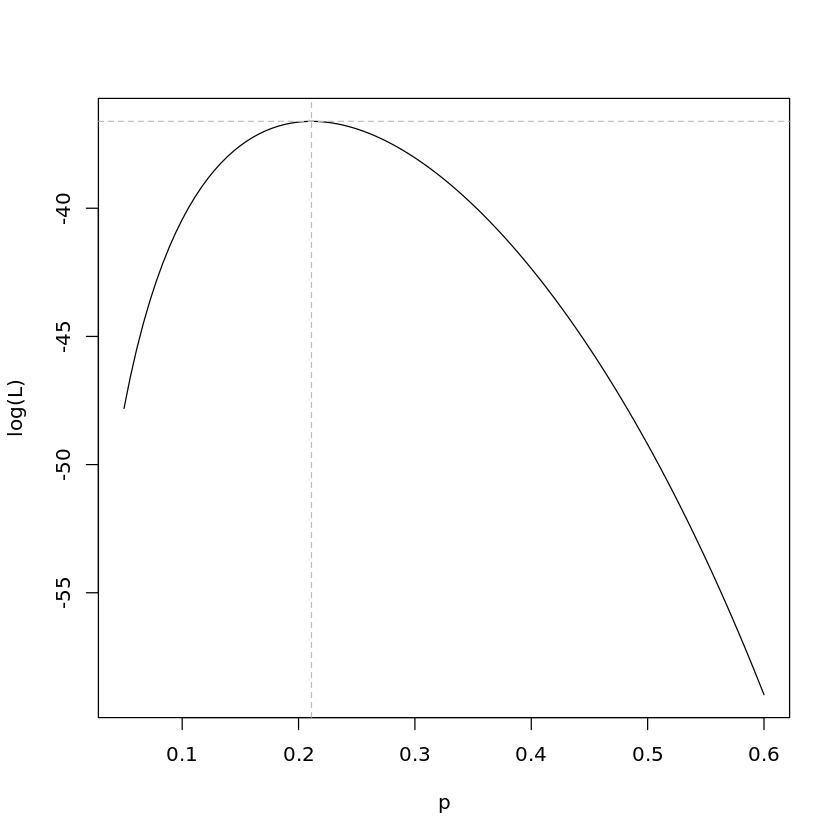

In [10]:
p <- seq(0.05, 0.6,  length.out = 100)        # sequência de 100 valores do parâmetro p da dist. geométrica
L <- c()
for(i in 1:100) L[i] <- prod(dgeom(x, p[i]))  # função L
plot(L ~ p, type = "l")                       # gráfico de L em função de p
o <- which.max(L)                             # indexa o máximo de L
p[o]                                          # estimativa de MV para p
L[o]                                          # máximo de L
plot(log(L) ~ p, type = "l")                  # gráfico de logL em função de p
log(L[o])                                     # máximo de logL
abline(v = p[o], h = log(L[o]), lty = 2, col = "gray")

___
**Teste da razão de verossimilhanças**

In [12]:
logL.ML <- log(prod(dpois(x, lambda = 3.737)))    # logL irrestrita
logL.H0 <- log(prod(dpois(x, lambda = 5)))      # logL sob H0: lambda = 5
LR = 2*(logL.ML - logL.H0)                      # estatística de teste
LR
1 - pchisq(LR, df = 1)                          # p-valor

[1] 5.280667

[1] 0.02156349

____
**Verossimilhança em regressão**

In [3]:
# dados de exemplo, modelo: y = a + bx + erro
x <- c(6, 10, 12, 13.5, 14.8)
y <- c(27, 68, 88, 101.4, 110)

In [14]:
# Estimativas de MV dos parâmetros
nlogL <- function(par) -sum(dnorm(y - par[1] - par[2]*x, mean = 0, sd = par[3], log = TRUE))
optim(par = c(a = 0, b = 2, sigma = 4), fn = nlogL)

$par
         a          b      sigma 
-29.062919   9.586506   1.827634 

$value
[1] 10.10736

$counts
function gradient 
     218       NA 

$convergence
[1] 0

$message
NULL

In [15]:
# TRV para H0: b = 0
nlogL.H0 <- nlogL(par = c(-29.06, 0,1.8276))
nlogL.ML <- nlogL(par = c(-29.06, 9.587,  1.8276))
LR <- -2*(nlogL.ML - nlogL.H0)
1 - pchisq(LR, df = 1)

[1] 0

___
**Verossimilhança restrita**

In [4]:
# usando os mesmos dados x, y
n <- length(y)               
p <- 2                        # n parâmetros (a e b)
X <- model.matrix(y ~ x)      # matriz do modelo
X

,(Intercept),x
1,1,6.0
2,1,10.0
3,1,12.0
4,1,13.5
5,1,14.8


In [5]:
H <- X %*% solve(t(X) %*% X, t(X))   # matriz de projeção do modelo
P <- diag(n)                         # matriz identidade n
P

1,0,0,0,0
0,1,0,0,0
0,0,1,0,0
0,0,0,1,0
0,0,0,0,1


In [6]:
S <- P - H   # matriz S
S

,1,2,3,4,5
1,0.21570367,-0.3399645,-0.1177986,0.04882582,0.1932337
2,-0.33996452,0.7664724,-0.1803092,-0.14039534,-0.1058033
3,-0.11779861,-0.1803092,0.7884355,-0.23500591,-0.2553218
4,0.04882582,-0.1403953,-0.2350059,0.69403615,-0.3674607
5,0.19323365,-0.1058033,-0.2553218,-0.36746072,0.5353523


In [7]:
# checando o posto (rank) de S com o pacote 'Matrix'
# install.packages('Matrix')

In [8]:
library(Matrix)
( posto  <- rankMatrix(S, tol = 1.1e-6) )

[1] 3
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 1.1e-06

In [9]:
A <- S[1:posto , ]  # matriz A, para obter z = Ay
A
z <- A %*% y
z
y - ( -29.068 + 9.587*x)    # residuos: y - (a + bx)

,1,2,3,4,5
1,0.2157037,-0.3399645,-0.1177986,0.04882582,0.1932337
2,-0.3399645,0.7664724,-0.1803092,-0.14039534,-0.1058033
3,-0.1177986,-0.1803092,0.7884355,-0.23500591,-0.2553218


1,-1.453227
2,1.199417
3,2.025739


[1] -1.4540  1.1980  2.0240  1.0435 -2.8196

In [1]:
# install.packages("mvtnorm")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [10]:
# obtendo a estimativa de MV para sigma por meio da logL da dist. normal multivariada para z
library(mvtnorm)
nlogRL  <- function(sigma) -dmvnorm(t(z), mean=rep(0, posto), 
                                    sigma = A %*% (sigma ^2 * P) %*% t(A), log=TRUE)
optimize(nlogRL , interval = c(0.1, 5))

$minimum
[1] 2.358318

$objective
[1] 4.359496

In [14]:
# Matriz de covariâncias residuais estimada por
Sigma  <- P * 2.3583^2
Sigma

5.561579,0.000000,0.000000,0.000000,0.000000
0.000000,5.561579,0.000000,0.000000,0.000000
0.000000,0.000000,5.561579,0.000000,0.000000
0.000000,0.000000,0.000000,5.561579,0.000000
0.000000,0.000000,0.000000,0.000000,5.561579


In [15]:
Sigma.inv  <- solve(Sigma)                                 # inversa de Sigma
solve(t(X) %*% Sigma.inv %*% X, t(X) %*% Sigma.inv %*% y)  # estimativa de a e b usando Sigma

(Intercept),-29.067807
x,9.586839
